In [2]:
import tensorflow as tf         # 딥러닝(인공지능 > 머신러닝 > 딥러닝)
import pandas as pd             # 데이터 분석
import numpy as np              # 수학 연산
import matplotlib.pyplot as plt # 시각화

1. 데이터셋 선택
2. 데이터 전처리
3. 데이터 변환
4. 데이터 마이닝
5. 데이터 마이닝 결과 평가

In [18]:
##1. 데이터셋 선택
파일경로 = 'https://bit.ly/3du615z'
회사매출정보 = pd.read_csv(파일경로)
회사매출정보.head()

# 실제 원본 데이터 : https://raw.githubusercontent.com/paullabkorea/tutorialproject/master/Tutorial_Data%20Analysis/데이터분석_매출액분석.csv

사업연차  매출_억  순익_억  직원수
0     1     2   0.4    6
1     2     4   0.8   12
2     3     6   1.2   18
3     4     8   1.6   24
4     5    10   2.0   30

In [19]:
## 2. 데이터 전처리
# 결측치(비어있는 데이터 확인)
회사매출정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업연차    5 non-null      int64  
 1   매출_억    5 non-null      int64  
 2   순익_억    5 non-null      float64
 3   직원수     5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 288.0 bytes


In [20]:
회사매출정보.isnull().sum()

사업연차    0
매출_억    0
순익_억    0
직원수     0
dtype: int64

In [21]:
## 3. 데이터 변환
# 매출 = 순익 + 비용
회사매출정보['비용'] = 회사매출정보['매출_억'] - 회사매출정보['순익_억']
회사매출정보

사업연차  매출_억  순익_억  직원수   비용
0     1     2   0.4    6  1.6
1     2     4   0.8   12  3.2
2     3     6   1.2   18  4.8
3     4     8   1.6   24  6.4
4     5    10   2.0   30  8.0

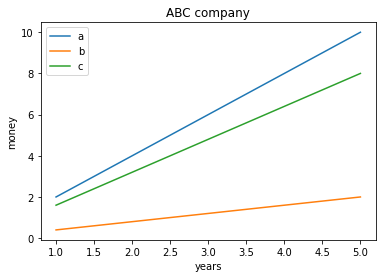

In [28]:
## 4. 데이터 마이닝
# 4.1 시각화 - Python, Tableau, Power BI, sas, spss, etc

plt.plot(회사매출정보['사업연차'], 회사매출정보['매출_억'], label='a')
plt.plot(회사매출정보['사업연차'], 회사매출정보['순익_억'], label='b')
plt.plot(회사매출정보['사업연차'], 회사매출정보['비용'], label='c')
plt.xlabel('years')
plt.ylabel('money')
plt.title("ABC company")
plt.legend()
plt.show()

In [29]:
## 4. 데이터 마이닝
# 4.2 예측 - sklearn, tensorflow, etc

독립 = 회사매출정보[['사업연차']] # 원인(기존 데이터)
종속 = 회사매출정보[['매출_억']] # 결과(알고 싶은 데이터)
print(독립.shape, 종속.shape)

(5, 1) (5, 1)


In [30]:
독립

사업연차
0     1
1     2
2     3
3     4
4     5

In [31]:
X = tf.keras.layers.Input(shape=[1]) # 독립변수의 col
Y = tf.keras.layers.Dense(1)(X) # 종속변수의 col
model = tf.keras.models.Model(X, Y) # 모델 준비
model.compile(loss='mse') #MSE(mean squared error) : 회귀 용도의 딥러닝 모델을 훈련시킬 때 사용되는 손실 함수

In [32]:
## 첫번째 학습
model.fit(독립, 종속, epochs=10) #epochs는 학습 수, 모델을 학습하는 과정

Epoch 1/10
1/1 [==============================] - 1s 589ms/step - loss: 59.8991
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 59.6927
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 59.5433
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 59.4184
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 59.3077
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 59.2063
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 59.1117
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 59.0221
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 58.9364
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 58.8539


In [33]:
model.predict([6])

array([[-1.8800672]], dtype=float32)

In [34]:
model.predict(독립)

array([[-0.298925  ],
       [-0.61515343],
       [-0.93138194],
       [-1.2476103 ],
       [-1.5638387 ]], dtype=float32)

In [35]:
model.get_weights() # y = wx + b, 인공신경망 - google에서 검색!

[array([[-0.31622845]], dtype=float32), array([0.01730344], dtype=float32)]

In [36]:
-0.31622845 * 6 + 0.01730344 # -1.8800672

-1.88006726

In [38]:
## 두번째 추가 학습
model.fit(독립, 종속, epochs=1000, verbose=0) #epochs는 학습 수, verbose는 출력 여부
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 0.3954
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.3949
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3943
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.3938
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.3933
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.3927
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.3922
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.3917
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.3911
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.3906


In [39]:
model.predict([6])

array([[11.074544]], dtype=float32)

In [40]:
model.predict(독립)

array([[3.0663514],
       [4.66799  ],
       [6.2696285],
       [7.8712673],
       [9.472906 ]], dtype=float32)

In [41]:
model.get_weights()

[array([[1.6016386]], dtype=float32), array([1.464713], dtype=float32)]

In [42]:
1.6016386 * 6 + 1.464713 # 11.074544

11.0745446

In [ ]:
## 5. 데이터 마이닝 결과 평가
# 문서로 나오게 될 것이고, 최종 적으로는 의사결정에 반영
# 예) 6년차에 12억 정도의 매출액이 나올 것이고, 
#     이에 따라 몇 명의 직원이 더 필요할 것이므로, 
#     직원을 00명 증원하세요.